In [71]:
import numpy as np
import scipy.integrate as integrate

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
%config InlineBackend.figure_format='retina'

In [72]:
def lorentzC(t,R):
    x, y, z    = R[0], R[1], R[2] # retrieve cartesian positions,
    vx, vy, vz = R[3], R[4], R[5] # velocities.
    
    r  = np.sqrt(x**2+y**2+z**2)
    if r < re:
        return np.array([0,0,0,
                     gyr*(0*bz-0*by),
                     gyr*(0*bx-0*bz),
                     gyr*(0*by-0*bx)])
    
    bx = 3*M*((x*z)/r**5)         # cartesian dipole components.
    by = 3*M*((y*z)/r**5)
    bz = M*((3*z**2-r**2)/r**5)

    return np.array([vx,vy,vz,
                     gyr*(vy*bz-vz*by),       # (v x B)xhat
                     gyr*(vz*bx-vx*bz),       # (v x B)yhat
                     gyr*(vx*by-vy*bx)])      # (v x B)zhat

In [73]:
re = (6.957*10**8)

In [78]:
def randstart(N):
    randy = (np.random.random(N)*3*re)-3*re/2
    randz = (np.random.random(N)*3*re)-3*re/2

    randvx = np.random.normal(loc=-5e5,scale=2.5e5/2,size=N)
    randvy = np.random.normal(loc=0,scale=2.5e5/10,size=N)
    randvz = np.random.normal(loc=0,scale=2.5e5/10,size=N)

    x0 = []
    for i,item in enumerate(randy):
        x0.append([2*re, randy[i], randz[i]])

    v0 = []
    for i,item in enumerate(randvx):
        v0.append([randvx[i], randvy[i], randvz[i]])
    return x0,v0

In [79]:
dt = 1e-3
t  = np.arange(0.0, 1, dt)

# gyroscopic ratio is set for electron. Magnetic field of Earth [Telsa]. Radius of the Earth is scaled to 1.
gyr = -1.759e11; M = -8e18;# M = -1.5e13; M = -9.7e27; -31000*1e-9*re**3

In [80]:
x0,v0 = randstart(1)

<IPython.core.display.Javascript object>


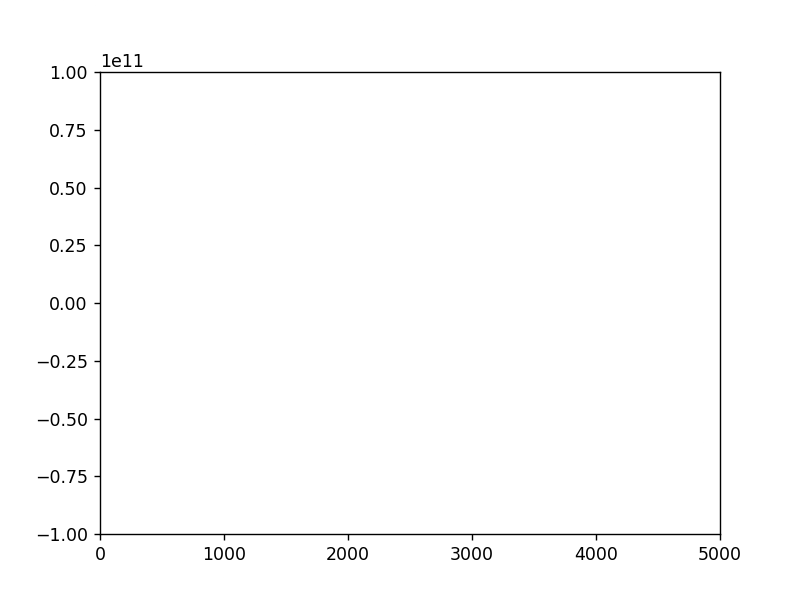

(-100000000000.0, 100000000000.0)

In [82]:
%matplotlib notebook
%matplotlib notebook

posList = []
for index, particle in enumerate(x0):
    initial_conditions = np.concatenate((x0[index], v0[index]))
    positions = integrate.odeint(func=lorentzC,y0=initial_conditions,t=t,tfirst=True)
    posList.append(positions)

fig = plt.figure()

for positions in posList:
    cart = np.array(positions[:,:3])
    cartvel = np.array(positions[:,3:6])
#     print(t,cartvel.T[2])
    
# print(cartvel.T[0]**2+(cartvel.T[1])**2+(cartvel.T[2])**2)
# plt.plot(t,cartvel.T[0]**2+(cartvel.T[1])**2+(cartvel.T[2])**2)
plt.plot(t,np.sqrt(cart.T[0]**2+cart.T[1]**2+cart.T[2]**2))

plt.xlim(0,5e3)
plt.ylim(-1e11,1e11)


C:\Users\ENG\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


<IPython.core.display.Javascript object>


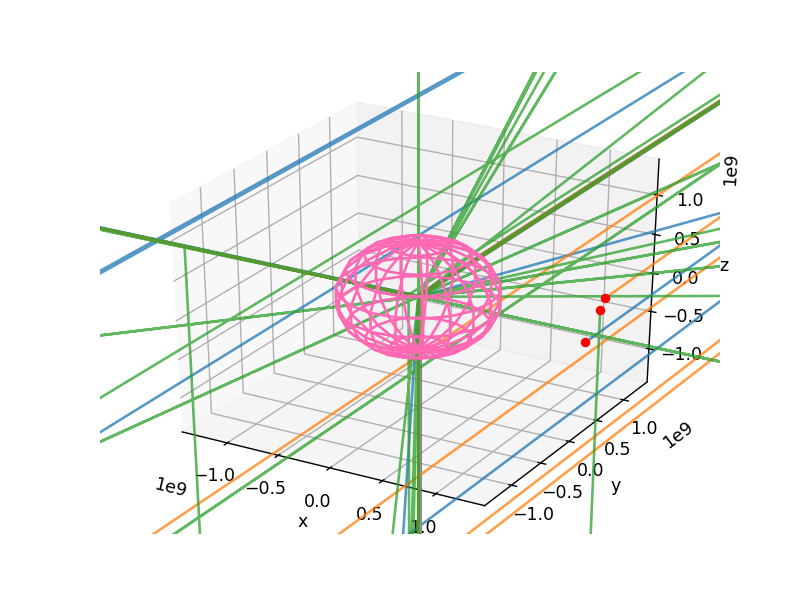

C:\Users\ENG\Anaconda3\lib\site-packages\matplotlib\transforms.py:2832: RuntimeWarning: overflow encountered in double_scalars
  elif vmax - vmin <= maxabsvalue * tiny:
C:\Users\ENG\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:537: RuntimeWarning: overflow encountered in double_scalars
  delta = (x1 - x0) * self._xmargin


In [21]:
# x0,v0 = randstart(3)

# posList = []
# for index, particle in enumerate(x0):
#     initial_conditions = np.concatenate((x0[index], v0[index]))
#     positions = integrate.odeint(func=lorentzC,y0=initial_conditions,t=t,tfirst=True)
#     posList.append(positions)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for positions in posList:
#     cart = np.array(positions[:,:3])
#     cartvel = np.array(positions[:,3:6])

#     ax.plot(cart.T[0], cart.T[1], cart.T[2],alpha=0.75)
#     ax.scatter3D(cart.T[0][0],cart.T[1][0],cart.T[2][0],color='red')
#     plt.plot(cart.T[0],cart.T[0])

    

# plt.xlabel('x')
# plt.ylabel('y')
# ax.set_zlabel('z')

# c = 2*re;
# plt.xlim(-c,c)
# plt.ylim(-c,c)
# ax.set_zlim(-c,c)

# # draw sphere
# u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
# x = re*np.cos(u)*np.sin(v)
# y = re*np.sin(u)*np.sin(v)
# z = re*np.cos(v)
# ax.plot_wireframe(x, y, z, color="hotpink")

# Add energy losses by dt or distance traveled. Subtract from energy in form of reducing velocity in whatever way we want!